# Dataset Columns Description

## Original Dataset Columns

| Column Name | Data Type | Description |
|------------|-----------|-------------|
| **name** | String | Full name/model of the car (e.g., "Maruti Swift Dzire VDI") |
| **year** | Integer | Manufacturing year of the car (1992-2020) |
| **selling_price** | Float | Selling price of the car in Indian Rupees (INR) |
| **km_driven** | Integer | Total kilometers driven by the car |
| **fuel** | Categorical | Type of fuel: Petrol, Diesel, CNG, LPG, or Electric |
| **seller_type** | Categorical | Type of seller: Individual, Dealer, or Trustmark Dealer |
| **transmission** | Categorical | Transmission type: Manual or Automatic |
| **owner** | Categorical | Ownership history: First Owner, Second Owner, Third Owner, Fourth & Above Owner, or Test Drive Car |

## Processed Dataset Columns

| Column Name | Data Type | Description |
|------------|-----------|-------------|
| **Car_Name** | String | Full name/model of the car (renamed from 'name') |
| **price** | Float | Selling price in INR (renamed from 'selling_price') |
| **Kms_Driven** | Integer | Total kilometers driven (renamed from 'km_driven') |
| **Fuel_Type** | Categorical | Type of fuel (renamed from 'fuel') |
| **Seller_Type** | Categorical | Type of seller (renamed from 'seller_type') |
| **Transmission** | Categorical | Transmission type (renamed from 'transmission') |
| **Owner** | Categorical | Ownership history (renamed from 'owner') |
| **car_age** | Integer | Age of the car calculated as (2025 - Year) |
| **Brand** | String | Car brand extracted from Car_Name (first word) |
| **Car_Model** | String | Car model extracted from Car_Name (first two words) |
| **log_kms** | Float | Natural logarithm of (Kms_Driven + 1) for normalization |
| **log_price** | Float | Natural logarithm of (price + 1) for normalization |

## Target Variable
- **price** (or **log_price**): The variable to be predicted by the machine learning models


#**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import joblib
import gradio as gr
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style("whitegrid")

#**Load Dataset**

In [2]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
# size of data
df.shape

(4340, 8)

In [4]:

df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object


In [5]:
#   statistics for numeric columns
print(df.describe())

              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [6]:
# statistics for categorical columns
print(df.describe(include='object'))

                          name    fuel seller_type transmission        owner
count                     4340    4340        4340         4340         4340
unique                    1491       5           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        69    2153        3244         3892         2832


In [7]:
# Unique values for specific columns
print("Fuel unique values:")
print(df['fuel'].unique())

print("\nSeller Type unique values:")
print(df['seller_type'].unique())

print("\nTransmission unique values:")
print(df['transmission'].unique())

print("\nOwner unique values:")
print(df['owner'].unique())


Fuel unique values:
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']

Seller Type unique values:
['Individual' 'Dealer' 'Trustmark Dealer']

Transmission unique values:
['Manual' 'Automatic']

Owner unique values:
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


#**Clean Data**

In [8]:
# 0.0 Show Duplicates

print('The Number Of Duplicates Rows' , df.duplicated().sum())

# 1. Remove Duplicates
df.drop_duplicates(inplace=True)

# 2. Rename columns
df.rename(columns={
    'year': 'Year',
    'selling_price': 'price',
    'km_driven': 'Kms_Driven',
    'fuel': 'Fuel_Type',
    'seller_type': 'Seller_Type',
    'transmission': 'Transmission',
    'owner': 'Owner',
    'name': 'Car_Name'
}, inplace=True)

# 3. Create 'car_age'
df["car_age"] = 2025 - df["Year"]
df.drop(["Year"], axis=1, inplace=True)
# 4. Extract 'Brand'
df['Brand'] = df['Car_Name'].apply(lambda x: x.split()[0])

# 5. Handle Nulls
df.dropna(inplace=True)



The Number Of Duplicates Rows 763


In [9]:
df.head()

,Car_Name,price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,Brand
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,18,Maruti
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,18,Maruti
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,13,Hyundai
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,8,Datsun
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,11,Honda


#**Visualizations**

Top 10 Most Popular Car Brands Bar Chart – Shows the most frequent car brands in the dataset.


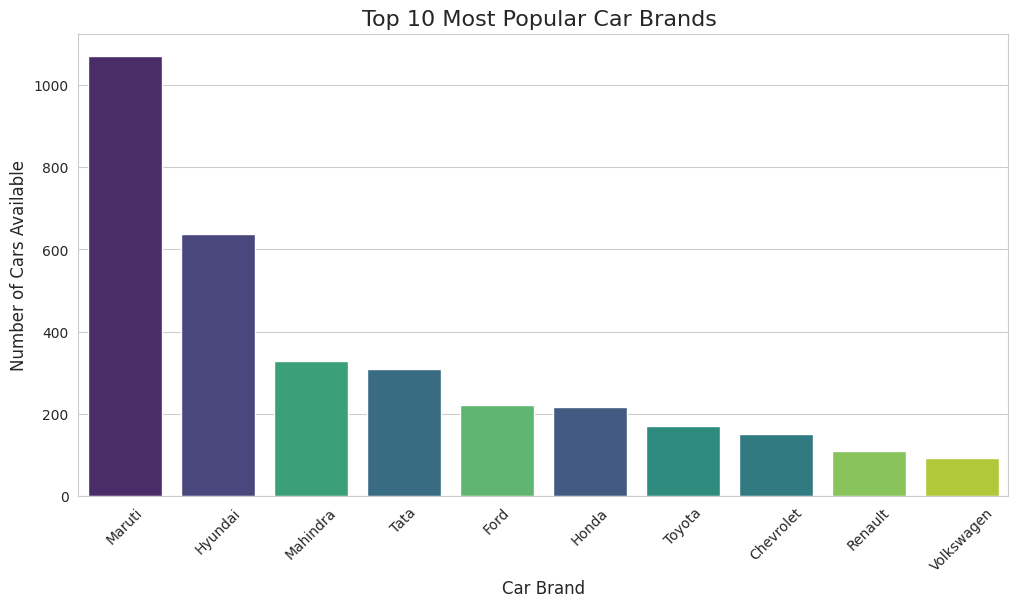

In [10]:
print('Top 10 Most Popular Car Brands Bar Chart – Shows the most frequent car brands in the dataset.')
plt.figure(figsize=(12, 6))
top_brands = df['Brand'].value_counts().head(10).index


sns.countplot(x='Brand', data=df[df['Brand'].isin(top_brands)], order=top_brands, palette='viridis',hue='Brand')

plt.title('Top 10 Most Popular Car Brands ', fontsize=16)
plt.xlabel('Car Brand', fontsize=12)
plt.ylabel('Number of Cars Available', fontsize=12)
plt.xticks(rotation=45)

plt.show()

print('')

Top 10 Highest Average Price Bar Chart – Displays brands with the highest average selling prices


/tmp/ipython-input-1395170000.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index,  y=avg_prices.values, palette='magma')


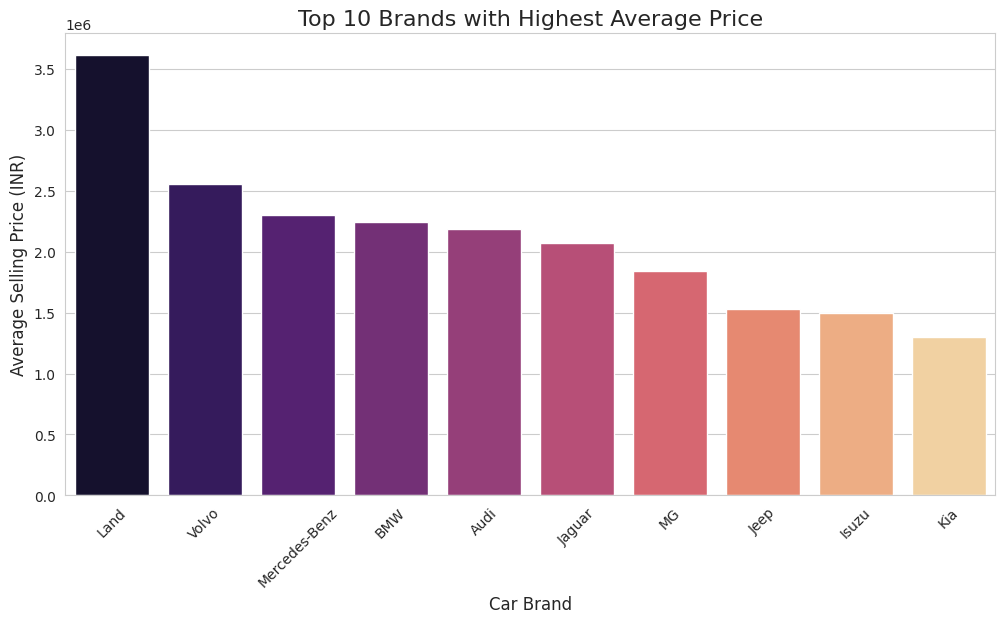

In [11]:
print('Top 10 Highest Average Price Bar Chart – Displays brands with the highest average selling prices')
plt.figure(figsize=(12, 6))

avg_prices = df.groupby('Brand')['price'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_prices.index,  y=avg_prices.values, palette='magma')

plt.title('Top 10 Brands with Highest Average Price', fontsize=16)
plt.xlabel('Car Brand', fontsize=12)
plt.ylabel('Average Selling Price (INR)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

Price Distribution Histogram – Illustrates the frequency distribution of car prices.


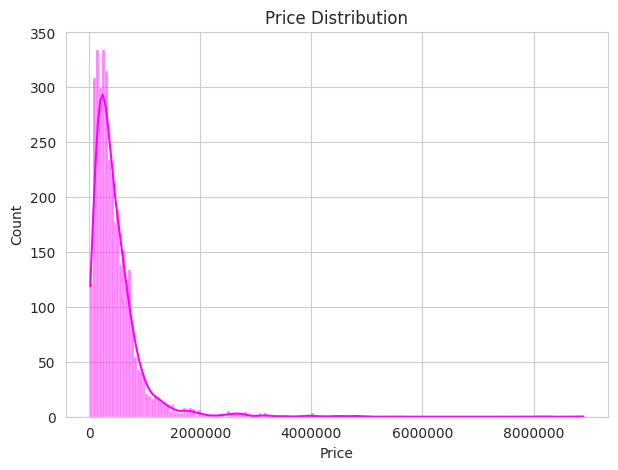

In [12]:
print('Price Distribution Histogram – Illustrates the frequency distribution of car prices.')
plt.figure(figsize=(7,5))
sns.histplot(df["price"], kde=True,color='magenta')

plt.xlabel("Price")
plt.title("Price Distribution")

plt.ticklabel_format(style='plain', axis='x')
plt.show()


Car Age Distribution Histogram – Shows how car ages are distributed in the dataset.


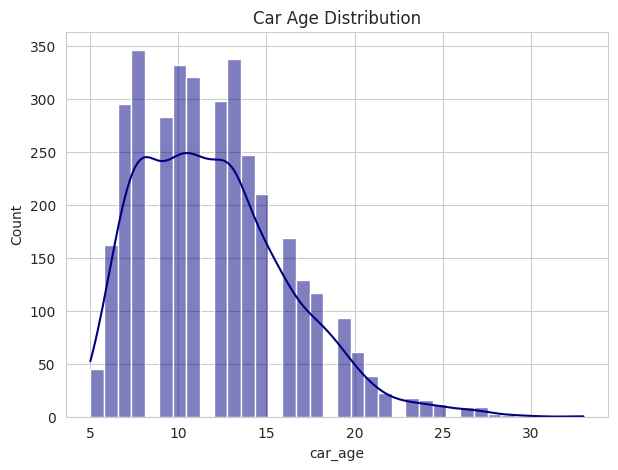

In [13]:
print('Car Age Distribution Histogram – Shows how car ages are distributed in the dataset.')
plt.figure(figsize=(7,5))
sns.histplot(df["car_age"], kde=True,color='navy')
plt.title("Car Age Distribution")
plt.show()

Fuel Type Count Bar Chart – Counts the number of cars per fuel type.


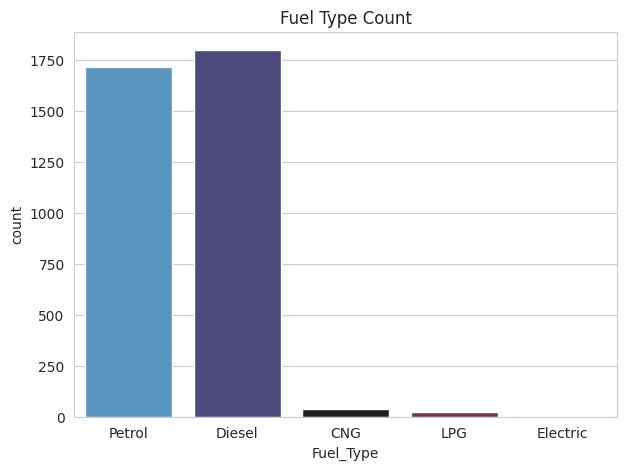

In [14]:
print('Fuel Type Count Bar Chart – Counts the number of cars per fuel type.')
plt.figure(figsize=(7,5))
sns.countplot(x="Fuel_Type", data=df,hue='Fuel_Type',palette='icefire')
plt.title("Fuel Type Count")
plt.show()

In [15]:
print('Fuel Type Distribution Pie Chart – Interactive pie chart showing fuel type proportions.')
# رسم دائرة تفاعلية محسنة (Interactive Pie Chart) لتوضيح توزيع البيانات حسب نوع الوقود (Fuel_Type)
fuel_counts = df['Fuel_Type'].value_counts()
fuel_df = pd.DataFrame({
    'Fuel_Type': fuel_counts.index,
    'Count': fuel_counts.values,
    'Percentage': (fuel_counts.values / fuel_counts.sum() * 100).round(1)
})


seaborn_colors = sns.color_palette('pastel', n_colors=len(fuel_counts))
colors_hex = ['#%02x%02x%02x' % (int(r*255), int(g*255), int(b*255)) for r, g, b in seaborn_colors]


fig_fuel = go.Figure(data=[go.Pie(
    labels=fuel_df['Fuel_Type'],
    values=fuel_df['Count'],
    hole=0.5,
    marker=dict(
        colors=colors_hex,
        line=dict(color='white', width=3)
    ),
    textinfo='label+percent',
    textposition='outside',
    hovertemplate='<b>%{label}</b><br>' +
                  'العدد: %{value}<br>' +
                  'النسبة: %{percent}<br>' +
                  '<extra></extra>',
    pull=[0.05 if i == fuel_counts.idxmax() else 0 for i in fuel_counts.index]
)])

fig_fuel.update_layout(
    title={
        'text': 'توزيع السيارات حسب نوع الوقود (Fuel Type Distribution)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    font=dict(size=12),
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.05
    ),
    height=600,
    width=800,
    template='plotly_white'
)

fig_fuel.show()
print('Seller Type Distribution Pie Chart – Interactive pie chart showing seller type proportions.')

seller_counts = df['Seller_Type'].value_counts()
seller_df = pd.DataFrame({
    'Seller_Type': seller_counts.index,
    'Count': seller_counts.values,
    'Percentage': (seller_counts.values / seller_counts.sum() * 100).round(1)
})


seaborn_colors2 = sns.color_palette('Set2', n_colors=len(seller_counts))
colors_hex2 = ['#%02x%02x%02x' % (int(r*255), int(g*255), int(b*255)) for r, g, b in seaborn_colors2]


fig_seller = go.Figure(data=[go.Pie(
    labels=seller_df['Seller_Type'],
    values=seller_df['Count'],
    hole=0.5,
    marker=dict(
        colors=colors_hex2,
        line=dict(color='white', width=3)
    ),
    textinfo='label+percent',
    textposition='outside',
    hovertemplate='<b>%{label}</b><br>' +
                  'العدد: %{value}<br>' +
                  'النسبة: %{percent}<br>' +
                  '<extra></extra>',
    pull=[0.05 if i == seller_counts.idxmax() else 0 for i in seller_counts.index]
)])

fig_seller.update_layout(
    title={
        'text': 'توزيع السيارات حسب نوع البائع (Seller Type Distribution)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    font=dict(size=12),
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.05
    ),
    height=600,
    width=800,
    template='plotly_white'
)

fig_seller.show()

Fuel Type Distribution Pie Chart – Interactive pie chart showing fuel type proportions.


Seller Type Distribution Pie Chart – Interactive pie chart showing seller type proportions.


Price vs Car Age Scatter Plot – Examines the relationship between car age and selling price.


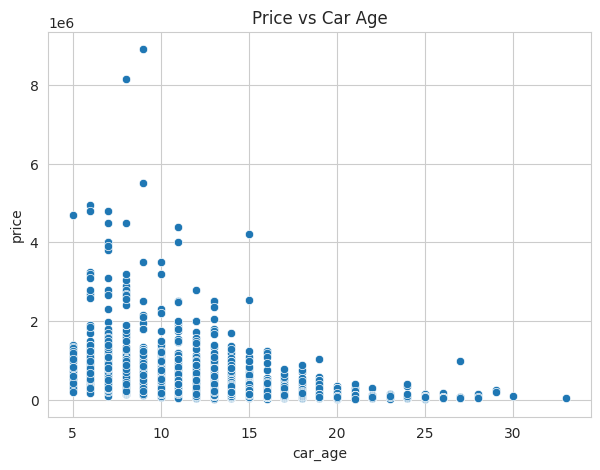

In [16]:
print('Price vs Car Age Scatter Plot – Examines the relationship between car age and selling price.')
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["car_age"], y=df["price"])
plt.title("Price vs Car Age")
plt.show()

Correlation Heatmap – Visualizes numeric feature correlations using a heatmap.


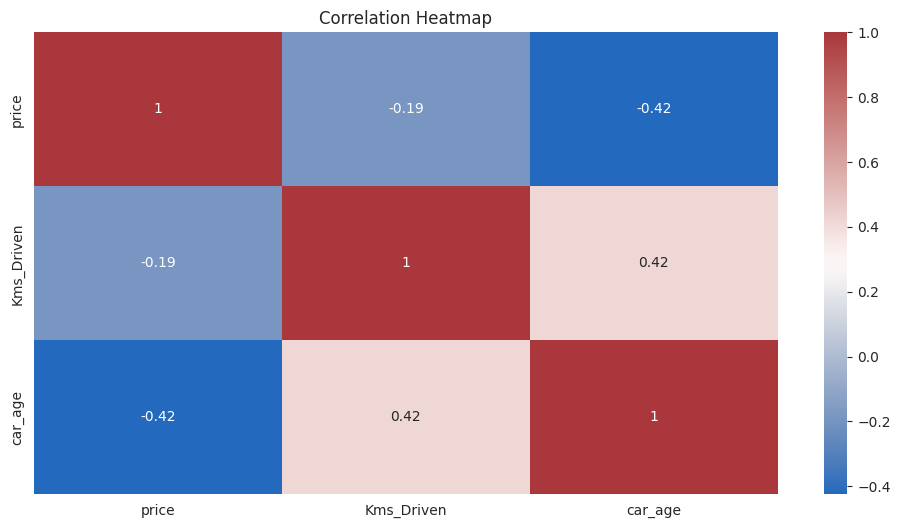

In [17]:
print('Correlation Heatmap – Visualizes numeric feature correlations using a heatmap.')
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="vlag")
plt.title("Correlation Heatmap")
plt.show()

Price vs Kms Driven Scatter Plot – Shows how price changes with kilometers driven.


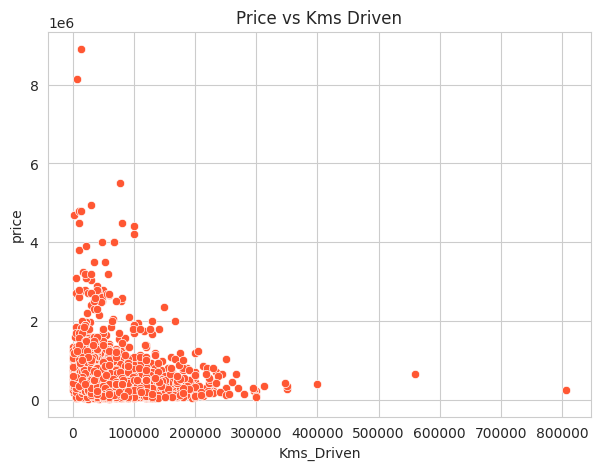

In [18]:
print('Price vs Kms Driven Scatter Plot – Shows how price changes with kilometers driven.')
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["Kms_Driven"], y=df["price"],color='#FF5733')
plt.title("Price vs Kms Driven")
plt.show()

Price by Fuel Type Box Plot – Compares price distributions across fuel types.


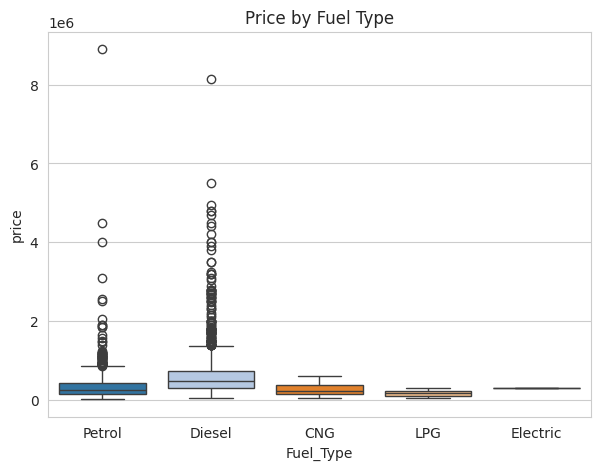

In [19]:
print('Price by Fuel Type Box Plot – Compares price distributions across fuel types.')
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Fuel_Type",y="price",   hue="Fuel_Type",  palette='tab20')
plt.title("Price by Fuel Type")
plt.show()

Price by Transmission Box Plot – Compares price distributions between manual and automatic transmissions.


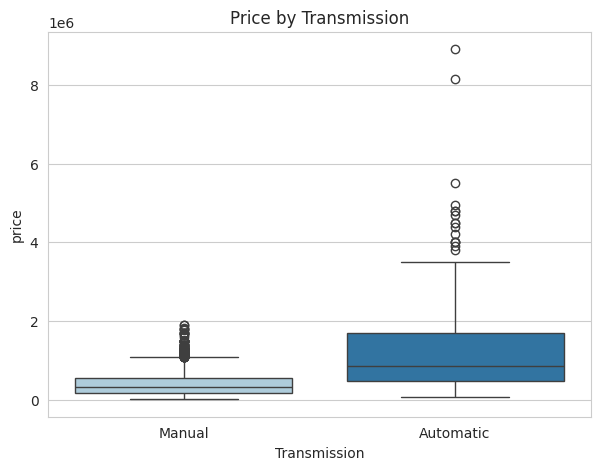

In [20]:
print('Price by Transmission Box Plot – Compares price distributions between manual and automatic transmissions.')
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x="Transmission", y="price",hue='Transmission',palette='Paired')
plt.title("Price by Transmission")
plt.show()

Kms Driven Distribution Histogram – Displays the frequency of kilometers driven.


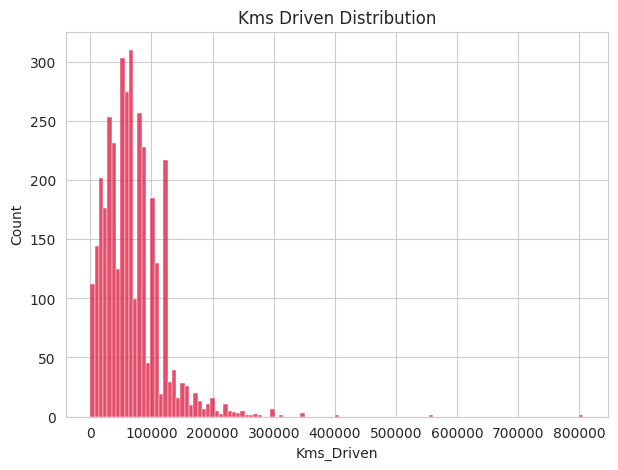

In [21]:
print('Kms Driven Distribution Histogram – Displays the frequency of kilometers driven.')
plt.figure(figsize=(7,5))
sns.histplot(df["Kms_Driven"],color='crimson')
plt.title("Kms Driven Distribution")
plt.show()

Seller Type Count Bar Chart – Counts the number of cars per seller type.


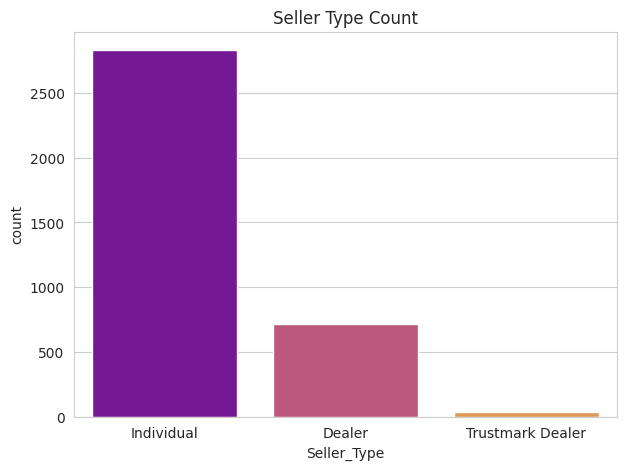

In [22]:
print('Seller Type Count Bar Chart – Counts the number of cars per seller type.')
plt.figure(figsize=(7,5))
sns.countplot(x="Seller_Type", data=df,hue='Seller_Type',palette='plasma')
plt.title("Seller Type Count")
plt.show()

Pair Plot – Multi-panel scatter and KDE plots for numeric features colored by fuel type


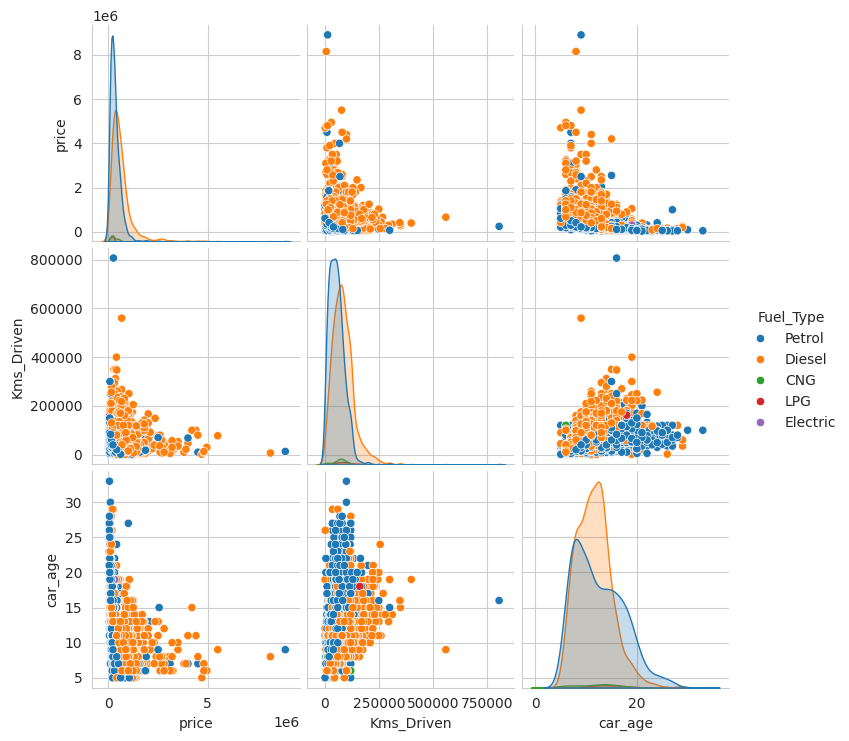

In [23]:
print('Pair Plot – Multi-panel scatter and KDE plots for numeric features colored by fuel type')
sns.pairplot(df[['price', 'Kms_Driven', 'car_age', 'Fuel_Type']], hue='Fuel_Type', diag_kind='kde')
plt.show()

Price Spread by Fuel Type Violin Plot – Shows price density and distribution per fuel type.


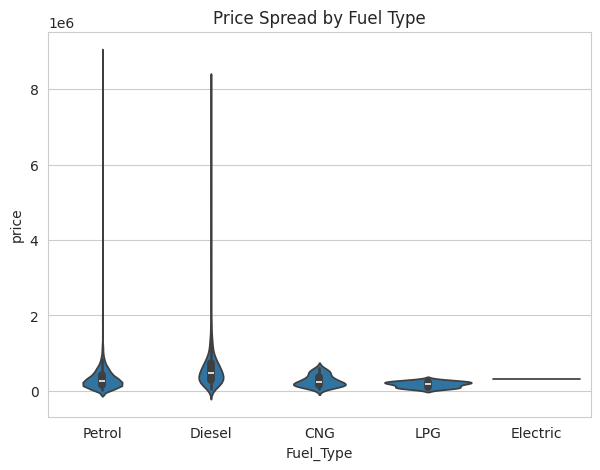

In [24]:
print('Price Spread by Fuel Type Violin Plot – Shows price density and distribution per fuel type.')
plt.figure(figsize=(7,5))
sns.violinplot(x=df["Fuel_Type"], y=df["price"])
plt.title("Price Spread by Fuel Type")
plt.show()

Car Age vs Price Joint Plot – Combines scatter plot and regression line for age vs price.


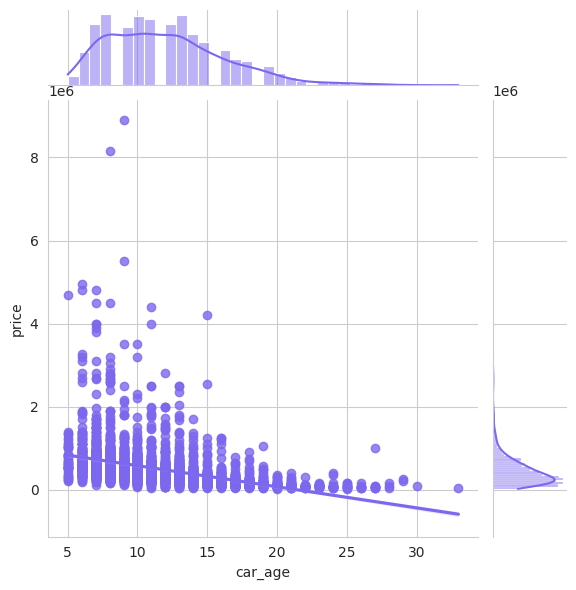

In [25]:
print('Car Age vs Price Joint Plot – Combines scatter plot and regression line for age vs price.')
sns.jointplot(x="car_age", y="price", data=df, kind="reg",color='mediumslateblue')
plt.show()

Price Density by Transmission KDE Plot – Overlayed density plots of price for transmission types.


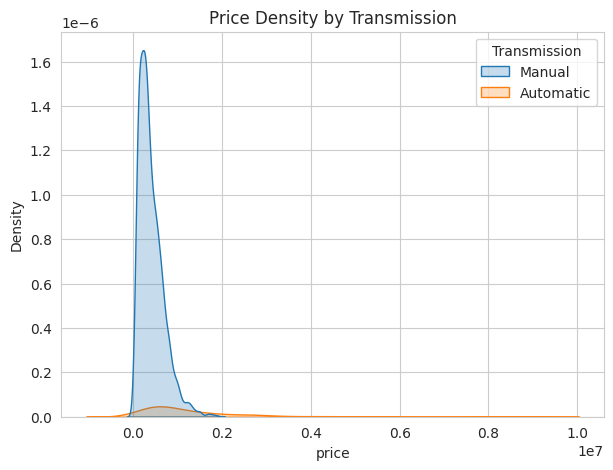

In [26]:
print('Price Density by Transmission KDE Plot – Overlayed density plots of price for transmission types.')
plt.figure(figsize=(7,5))
sns.kdeplot(data=df, x="price", hue="Transmission", fill=True)
plt.title("Price Density by Transmission")
plt.show()

#**Outlier Handling**

In [27]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Acceptable Price Range: {lower_bound:,.0f} to {upper_bound:,.0f}")


df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].copy()

# 5. Display the Results
outliers_count = len(df) - len(df_clean)
print(f"\nOriginal Dataset Size: {df.shape}")
print(f"Cleaned Dataset Size:  {df_clean.shape}")
print(f"Number of Outliers Removed: {outliers_count}")
print("-" * 40)
print("First 5 rows of clean data:")
print(df_clean.head())

Acceptable Price Range: -400,000 to 1,200,000

Original Dataset Size: (3577, 9)
Cleaned Dataset Size:  (3407, 9)
Number of Outliers Removed: 170
----------------------------------------
First 5 rows of clean data:
                   Car_Name   price  Kms_Driven Fuel_Type Seller_Type  \
0             Maruti 800 AC   60000       70000    Petrol  Individual   
1  Maruti Wagon R LXI Minor  135000       50000    Petrol  Individual   
2      Hyundai Verna 1.6 SX  600000      100000    Diesel  Individual   
3    Datsun RediGO T Option  250000       46000    Petrol  Individual   
4     Honda Amaze VX i-DTEC  450000      141000    Diesel  Individual   

  Transmission         Owner  car_age    Brand  
0       Manual   First Owner       18   Maruti  
1       Manual   First Owner       18   Maruti  
2       Manual   First Owner       13  Hyundai  
3       Manual   First Owner        8   Datsun  
4       Manual  Second Owner       11    Honda  


Post-Outlier Price Range Box Plot for Top 10 Brands – Price distribution per brand after outlier removal


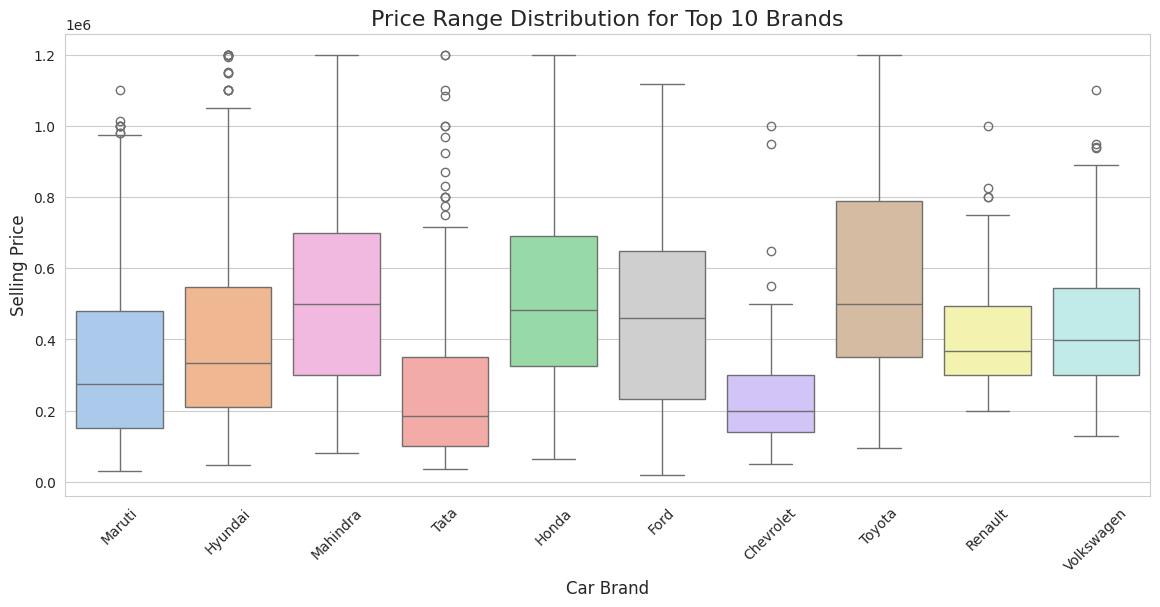

In [28]:
print('Post-Outlier Price Range Box Plot for Top 10 Brands – Price distribution per brand after outlier removal')
plt.figure(figsize=(14, 6))

common_brands = df_clean['Brand'].value_counts().head(10).index

sns.boxplot(x='Brand', y='price', data=df_clean[df_clean['Brand'].isin(common_brands)], order=common_brands, palette='pastel',hue='Brand')

plt.title('Price Range Distribution for Top 10 Brands', fontsize=16)
plt.xlabel('Car Brand', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.xticks(rotation=45)

plt.show()

Post-Outlier Price by Fuel Type Box Plot – Fuel-based price comparison after cleaning.


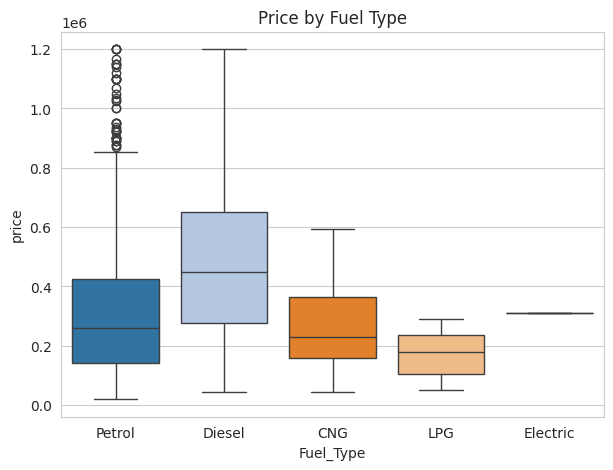

In [29]:
# 7 Boxplot Fuel Type vs Price
print('Post-Outlier Price by Fuel Type Box Plot – Fuel-based price comparison after cleaning.')
plt.figure(figsize=(7,5))
sns.boxplot(data=df_clean, x="Fuel_Type",y="price",   hue="Fuel_Type",  palette='tab20')
plt.title("Price by Fuel Type")
plt.show()

Post-Outlier Price by Transmission Box Plot – Transmission-based price comparison after cleaning.


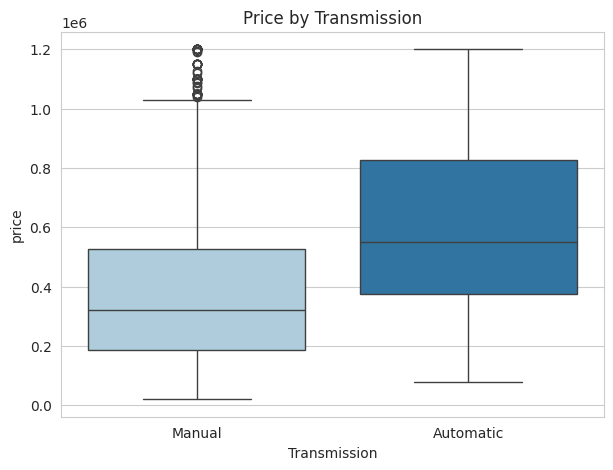

In [30]:
# 8 Boxplot Transmission vs Price
print('Post-Outlier Price by Transmission Box Plot – Transmission-based price comparison after cleaning.')
plt.figure(figsize=(7,5))
sns.boxplot(data=df_clean,x="Transmission", y="price",hue='Transmission',palette='Paired')
plt.title("Price by Transmission")
plt.show()

Post-Outlier Car Age vs Price Joint Plot – Age-price relationship after outlier removal.


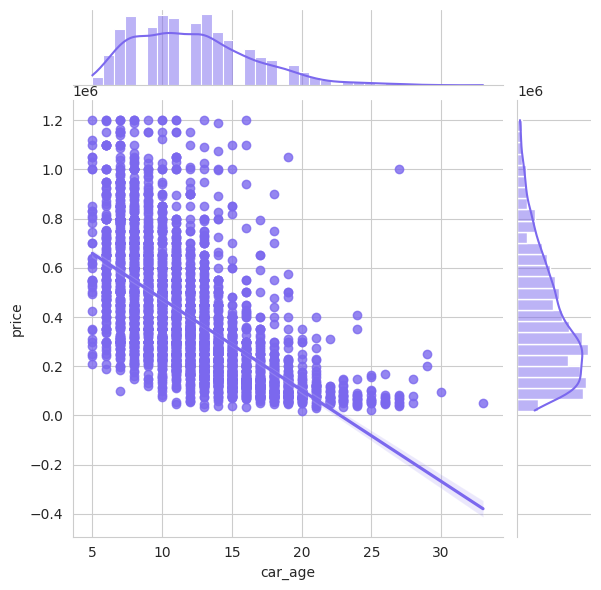

In [31]:
print('Post-Outlier Car Age vs Price Joint Plot – Age-price relationship after outlier removal.')
sns.jointplot(x="car_age", y="price", data=df_clean, kind="reg",color='mediumslateblue')
plt.show()

Post-Outlier Price Spread by Fuel Type Violin Plot – Fuel-wise price distribution after cleaning.


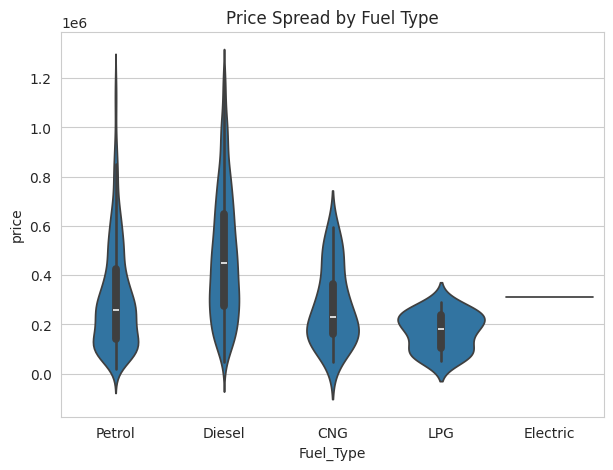

In [32]:
print('Post-Outlier Price Spread by Fuel Type Violin Plot – Fuel-wise price distribution after cleaning.')
plt.figure(figsize=(7,5))
sns.violinplot(x=df_clean["Fuel_Type"], y=df["price"])
plt.title("Price Spread by Fuel Type")
plt.show()

Post-Outlier Price Density by Transmission KDE Plot – Transmission-based price density after cleaning.


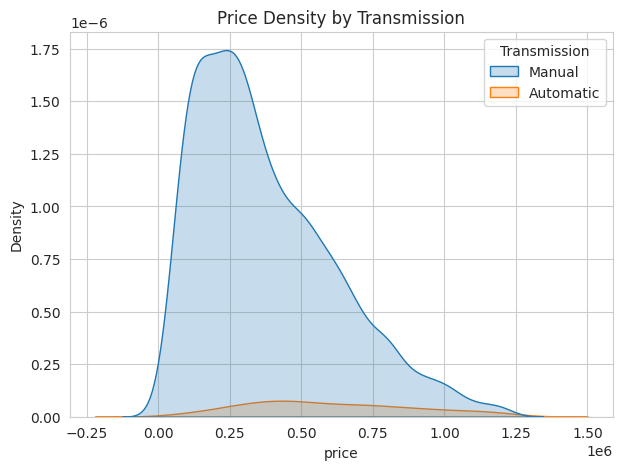

In [33]:
print('Post-Outlier Price Density by Transmission KDE Plot – Transmission-based price density after cleaning.')
plt.figure(figsize=(7,5))
sns.kdeplot(data= df_clean, x="price", hue="Transmission", fill=True)
plt.title("Price Density by Transmission")
plt.show()

##  Final Insights

- **Transmission**: Automatic cars generally command a higher price.
- **Fuel**: Diesel cars often have higher selling prices compared to Petrol.
- **Age**: Newer cars (lower age) significantly fetch better prices. The depreciation curve is visible.
- **Seller**: Dealers might list cars at higher prices than Individuals.
- **Brands**: Top brands like Maruti and Hyundai dominate the listings.


# **Encodenig Data**

In [34]:
df

,Car_Name,price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,Brand
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,18,Maruti
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,18,Maruti
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,13,Hyundai
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,8,Datsun
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,11,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,Second Owner,11,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner,11,Hyundai
4337,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner,16,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner,9,Hyundai


In [35]:

df['Car_Model'] = df['Car_Name'].apply(lambda x: ' '.join(x.split()[:2]))

# Categorical columns
categorical_cols = ["Fuel_Type", "Seller_Type", "Transmission", "Owner",'Car_Model','Brand']

# Label encode categorical features
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


df['log_kms'] = np.log1p(df['Kms_Driven'])
df['log_price'] = np.log1p(df['price'])






In [36]:
df

,Car_Name,price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,Brand,Car_Model,log_kms,log_price
0,Maruti 800 AC,60000,70000,4,1,1,0,18,18,97,11.156265,11.002117
1,Maruti Wagon R LXI Minor,135000,50000,4,1,1,0,18,18,117,10.819798,11.813037
2,Hyundai Verna 1.6 SX,600000,100000,1,1,1,0,13,10,69,11.512935,13.304687
3,Datsun RediGO T Option,250000,46000,4,1,1,0,8,5,27,10.736418,12.429220
4,Honda Amaze VX i-DTEC,450000,141000,1,1,1,2,11,9,47,11.856522,13.017005
...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,1,1,1,2,11,10,72,11.289794,12.923912
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,1,1,1,2,11,10,72,11.289794,12.923912
4337,Maruti 800 AC BSIII,110000,83000,4,1,1,2,16,18,97,11.326608,11.608245
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,1,1,1,0,9,10,58,11.407576,13.670486


# **TRAIN / TEST SPLIT**

In [37]:
X = df.drop(['price','log_price','Car_Name','Brand'], axis=1)
# y = df["price"]
y_log = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

In [38]:
X

,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,Car_Model,log_kms
0,70000,4,1,1,0,18,97,11.156265
1,50000,4,1,1,0,18,117,10.819798
2,100000,1,1,1,0,13,69,11.512935
3,46000,4,1,1,0,8,27,10.736418
4,141000,1,1,1,2,11,47,11.856522
...,...,...,...,...,...,...,...,...
4335,80000,1,1,1,2,11,72,11.289794
4336,80000,1,1,1,2,11,72,11.289794
4337,83000,4,1,1,2,16,97,11.326608
4338,90000,1,1,1,0,9,58,11.407576


# **Train ML Models**

In [39]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01, max_iter=10000),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(random_state=1),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost":  XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=8,  subsample=0.8, colsample_bytree=0.8,reg_alpha=0.1,    reg_lambda=0.1,n_jobs=-1, random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    preds_real = np.expm1(preds)
    y_test_real = np.expm1(y_test)

    mse = mean_squared_error(y_test_real, preds_real)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    results.append([name, mse, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "R2 Score"])
results_df = results_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)

print("\nMODEL PERFORMANCE:")
styled_df = results_df.style.format({
    'MSE': '{:,.0f}',
    'RMSE': '{:,.0f}',
    'MAE': '{:,.0f}',
    'MAPE (%)': '{:.2f}',
    'R2 Score': '{:.4f}',
    'CV R2 Score': '{:.4f}'
}).background_gradient(subset=['R2 Score'], cmap='YlGn')
display(styled_df)


MODEL PERFORMANCE:


,Model,MSE,RMSE,R2 Score
0,Hist Gradient Boosting,"146,632,205,382","382,926",0.8452
1,XGBoost,"149,809,531,702","387,052",0.8419
2,Random Forest,"154,980,441,904","393,676",0.8139
3,Gradient Boosting,"138,706,056,516","372,433",0.8119
4,Decision Tree,"216,943,431,161","465,772",0.6851
5,Ridge,"178,880,458,532","422,943",0.6734
6,Linear Regression,"178,619,851,850","422,634",0.6734
7,Lasso,"192,541,709,786","438,796",0.6696
8,ElasticNet,"285,008,153,632","533,862",0.4738
9,KNN Regressor,"305,237,492,571","552,483",0.3196


#**Performance Plots**

Best Model Scatter Plot – Actual vs predicted prices for the best-performing model.


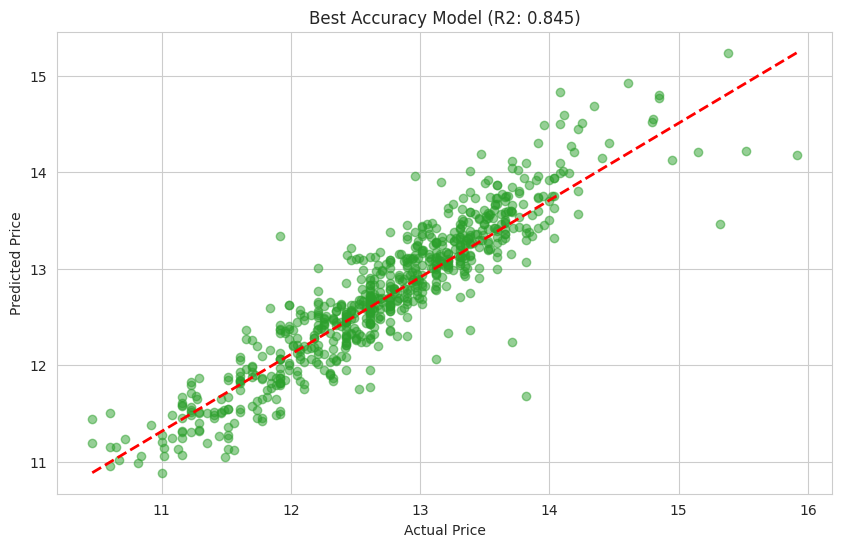

In [40]:
print('Best Model Scatter Plot – Actual vs predicted prices for the best-performing model.')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds, alpha=0.5, color='#2ca02c')
plt.plot([y_test.min(), y_test.max()], [preds.min(), preds.max()], 'r--', lw=2)
plt.title(f"Best Accuracy Model (R2: {r2:.3f})")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

Model R² Score Bar Chart – Compares R² scores across all trained models


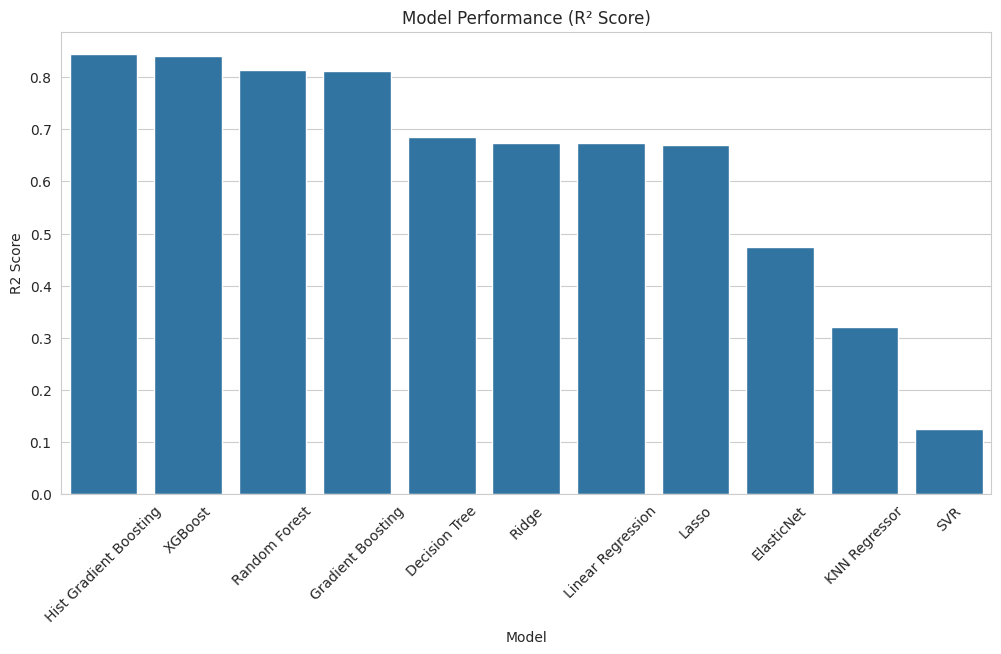

Model RMSE Bar Chart – Compares RMSE values across all trained models.


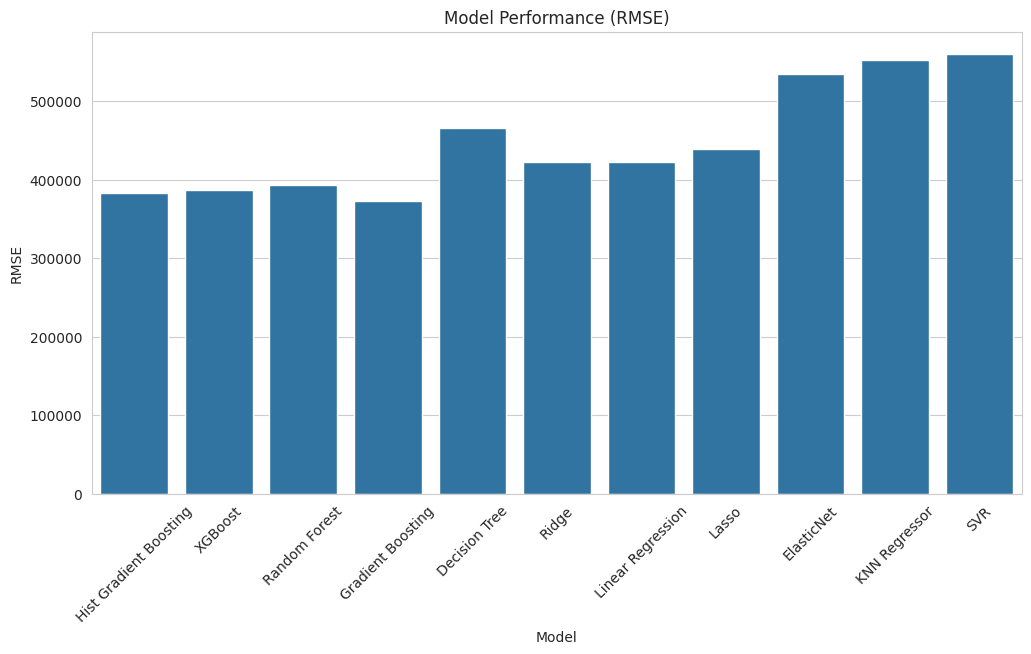

In [41]:
print('Model R² Score Bar Chart – Compares R² scores across all trained models')
plt.figure(figsize=(12,6))
sns.barplot(data=results_df, x="Model", y="R2 Score")
plt.title("Model Performance (R² Score)")
plt.xticks(rotation=45)
plt.show()
print('Model RMSE Bar Chart – Compares RMSE values across all trained models.')
plt.figure(figsize=(12,6))
sns.barplot(data=results_df, x="Model", y="RMSE")
plt.title("Model Performance (RMSE)")
plt.xticks(rotation=45)
plt.show()

# **Best Model Selection And Save**

In [53]:
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\nBEST MODEL SELECTED AUTOMATICALLY: {best_model_name}")

joblib.dump(best_model, "best_model.pkl")
print("Best model saved as: best_model.pkl")


BEST MODEL SELECTED AUTOMATICALLY: Hist Gradient Boosting
Best model saved as: best_model.pkl


# **Feature Important**

Feature Importance Bar Chart – Displays permutation importance scores for model features.


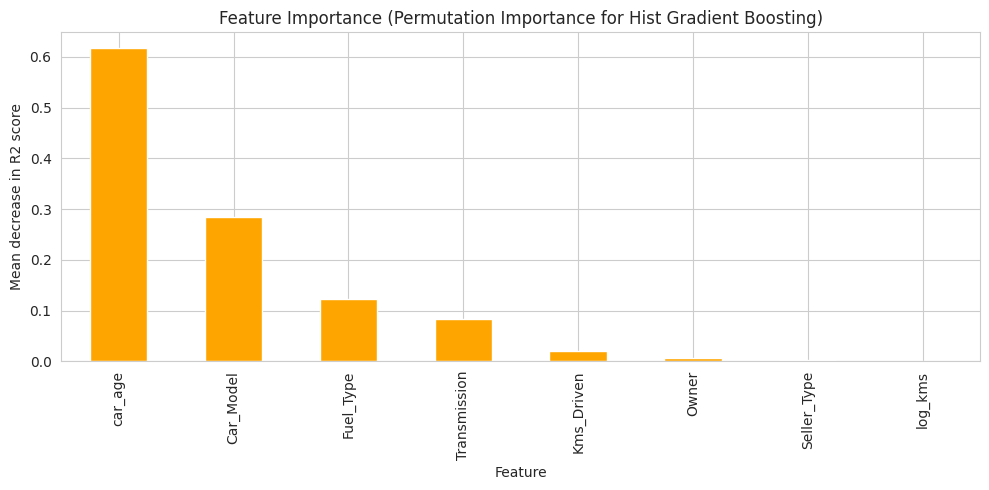

,0
car_age,0.617545
Car_Model,0.285080
Fuel_Type,0.122695
Transmission,0.083168
Kms_Driven,0.020414
Owner,0.006915
Seller_Type,0.003394
log_kms,0.000000


In [43]:
print('Feature Importance Bar Chart – Displays permutation importance scores for model features.')
rf = HistGradientBoostingRegressor(random_state=42)
rf.fit(X_train, y_train)

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

importance = pd.Series(result.importances_mean, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
importance.plot(kind='bar',color='orange')
plt.title("Feature Importance (Permutation Importance for Hist Gradient Boosting)")
plt.ylabel("Mean decrease in R2 score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

display(importance)

# **User InterFace**

In [56]:
# Load the best model
best_model = joblib.load("best_model.pkl")


def predict_price_human(input_data):
    """
    Predicts the car price based on input features.
    input_data is expected to be a dictionary with keys matching the Gradio inputs:
    "Fuel_Type", "Seller_Type", "Transmission", "Owner", "Kms_Driven", "car_age"
    """
    global encoders, df


    input_df = pd.DataFrame([{
        "Kms_Driven": int(input_data["Kms_Driven"]),
        "Fuel_Type": input_data["Fuel_Type"],
        "Seller_Type": input_data["Seller_Type"],
        "Transmission": input_data["Transmission"],
        "Owner": input_data["Owner"],
        "car_age": int(input_data["car_age"]),
    }])


    for col in ["Fuel_Type", "Seller_Type", "Transmission", "Owner"]:
        if col in input_df.columns and col in encoders:
            try:

                input_df[col] = encoders[col].transform(input_df[col])
            except ValueError:

                if input_df[col].iloc[0] not in encoders[col].classes_:

                    input_df[col] = encoders[col].transform([encoders[col].classes_[0]])[0]
                else:
                    input_df[col] = encoders[col].transform(input_df[col])

    input_df['log_kms'] = np.log1p(input_df['Kms_Driven'])


    if 'Car_Model' in df.columns:
        most_frequent_car_model_label = df['Car_Model'].mode()[0]
    else:
        most_frequent_car_model_label = 0

    input_df['Car_Model'] = most_frequent_car_model_label


    model_columns = ['Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'car_age', 'Car_Model', 'log_kms']

    input_for_prediction = input_df[model_columns]

    predicted_log_price = best_model.predict(input_for_prediction)

    predicted_price = np.expm1(predicted_log_price)[0]

    return predicted_price


def predict_car_price(Fuel_Type, Seller_Type, Transmission, Owner, Kms_Driven, car_age, show_currency_conversion=True):
    """
    دالة للتنبؤ بسعر السيارة للاستخدام مع Gradio Interface
    محسّنة مع معالجة أخطاء أفضل وتحويل العملة

    ملاحظة: البيانات الأصلية بالروبية الهندية (INR) لأنها من سوق سيارات هندي
    """
    try:
        if not all([Fuel_Type, Seller_Type, Transmission, Owner]):
            return "❌ Error: Please fill all required fields."

        if Kms_Driven <= 0 or car_age <= 0:
            return "❌ Error: Kilometers Driven and Car Age must be positive numbers."

        input_data = {
            "Fuel_Type": str(Fuel_Type).strip(),
            "Seller_Type": str(Seller_Type).strip(),
            "Transmission": str(Transmission).strip(),
            "Owner": str(Owner).strip(),
            "Kms_Driven": int(float(Kms_Driven)),
            "car_age": int(float(car_age))
        }

        predicted_price_inr = predict_price_human(input_data)

        if np.isinf(predicted_price_inr) or np.isnan(predicted_price_inr):
            return "❌ Error: Invalid prediction result. Please check your inputs and try again."

        if predicted_price_inr < 10000:
            return f"⚠️ Warning: Predicted price seems too low: {predicted_price_inr:,.2f} INR. Please verify inputs."
        elif predicted_price_inr > 10000000:
            return f"⚠️ Warning: Predicted price seems too high: {predicted_price_inr:,.2f} INR. Please verify inputs."


        exchange_rates = {
            'USD': 0.012,
            'EUR': 0.011,
            'EGP': 0.37,
            'SAR': 0.045,
            'AED': 0.044
        }

        result = f"""
### 💰 Predicted Price

**Indian Rupees (INR):** {predicted_price_inr:,.2f} INR

*Note: Original data is in Indian Rupees (INR) from CarDekho (Indian car market)*
"""

        if show_currency_conversion:
            result += "\n**Currency Conversion (Approximate):**\n\n"
            for currency, rate in exchange_rates.items():
                converted_price = predicted_price_inr * rate
                currency_names = {
                    'USD': 'US Dollar',
                    'EUR': 'Euro',
                    'EGP': 'Egyptian Pound',
                    'SAR': 'Saudi Riyal',
                    'AED': 'UAE Dirham'
                }
                result += f"- **{currency_names[currency]} ({currency}):** {converted_price:,.2f}\n"
            result += "\n*Exchange rates are approximate and may vary.*"

        return result

    except ValueError as e:
        return f"❌ Error: {str(e)}"
    except KeyError as e:
        return f"❌ Error: Invalid input value - {str(e)}"
    except Exception as e:
        return f"❌ Unexpected Error: {str(e)}"

print("=" * 80)
print("Preparing Enhanced Gradio Interface...")
print("=" * 80)

fuel_types = sorted(encoders['Fuel_Type'].classes_.tolist())
seller_types = sorted(encoders['Seller_Type'].classes_.tolist())
transmission_types = sorted(encoders['Transmission'].classes_.tolist())
owner_types = sorted(encoders['Owner'].classes_.tolist())

kms_stats = {
    'min': int(df_clean['Kms_Driven'].min()),
    'max': int(df_clean['Kms_Driven'].max()),
    'mean': int(df_clean['Kms_Driven'].mean()),
    'median': int(df_clean['Kms_Driven'].median())
}

age_stats = {
    'min': int(df_clean['car_age'].min()),
    'max': int(df_clean['car_age'].max()),
    'mean': int(df_clean['car_age'].mean()),
    'median': int(df_clean['car_age'].median())
}

model_performance = {
    'name': best_model_name,
    'r2': float(results_df.iloc[0]['R2 Score']),
    'rmse': float(results_df.iloc[0]['RMSE']),
}

print(f"✓ Fuel Types: {fuel_types}")
print(f"✓ Seller Types: {seller_types}")
print(f"✓ Transmission Types: {transmission_types}")
print(f"✓ Owner Types: {owner_types}")
print(f"✓ Kms Driven Range: {kms_stats['min']:,} - {kms_stats['max']:,}")
print(f"✓ Car Age Range: {age_stats['min']} - {age_stats['max']} years")
print(f"✓ Best Model: {model_performance['name']}")
print(f"✓ Model R² Score: {model_performance['r2']:.4f}")
print("=" * 80)

with gr.Blocks(title="🚗 Used Car Price Predictor") as demo:

    gr.Markdown("""
    # 🚗 Used Car Price Predictor

    Predict the selling price of used cars based on their features using advanced Machine Learning models.

    ### 📊 Model Performance
    - **Best Model:** {model_name}
    - **R² Score:** {r2:.4f} ({r2_pct:.1f}% accuracy)
    - **RMSE:** {rmse:,.0f} INR

    ### 💱 Currency Information
    **Note:** Prices are displayed in **Indian Rupees (INR)** because the training data comes from
    [CarDekho](https://www.cardekho.com/) - an Indian car marketplace.
    You can enable currency conversion below to see prices in other currencies (USD, EUR, EGP, SAR, AED).

    ---
    """.format(
        model_name=model_performance['name'],
        r2=model_performance['r2'],
        r2_pct=model_performance['r2'] * 100,
        rmse=model_performance['rmse']
    ))

    with gr.Row():
        with gr.Column(scale=1):
            fuel_input = gr.Dropdown(
                choices=fuel_types,
                label="⛽ Fuel Type",
                value=fuel_types[0] if fuel_types else None,
                info="Select the type of fuel"
            )

            seller_input = gr.Dropdown(
                choices=seller_types,
                label="👤 Seller Type",
                value=seller_types[0] if seller_types else None,
                info="Type of seller"
            )

        with gr.Column(scale=1):
            transmission_input = gr.Dropdown(
                choices=transmission_types,
                label="⚙️ Transmission",
                value=transmission_types[0] if transmission_types else None,
                info="Manual or Automatic"
            )

            owner_input = gr.Dropdown(
                choices=owner_types,
                label="📋 Owner",
                value=owner_types[0] if owner_types else None,
                info="Car ownership history"
            )

    with gr.Row():
        kms_input = gr.Slider(
            minimum=kms_stats['min'],
            maximum=min(kms_stats['max'], 500000),
            value=kms_stats['median'],
            step=1000,
            label="🛣️ Kilometers Driven",
            info=f"Range: {kms_stats['min']:,} - {min(kms_stats['max'], 500000):,} km"
        )

        age_input = gr.Slider(
            minimum=age_stats['min'],
            maximum=min(age_stats['max'], 35),
            value=age_stats['median'],
            step=1,
            label="📅 Car Age (Years)",
            info=f"Range: {age_stats['min']} - {min(age_stats['max'], 35)} years"
        )

    currency_checkbox = gr.Checkbox(
        label="💱 Show Currency Conversion",
        value=True,
        info="Display price in multiple currencies (USD, EUR, EGP, SAR, AED)"
    )

    predict_btn = gr.Button("🔮 Predict Price", variant="primary", size="lg")

    output = gr.Markdown(
        label="Prediction Result",
        value="👆 Enter car details above and click 'Predict Price' to get an estimate."
    )

    gr.Markdown("### 💡 Example Inputs")
    gr.Examples(
        examples=[
            ["Petrol", "Individual", "Manual", "First Owner", 50000, 7],
            ["Diesel", "Dealer", "Automatic", "First Owner", 20000, 5],
            ["CNG", "Individual", "Manual", "Second Owner", 75000, 10],
            ["LPG", "Individual", "Manual", "First Owner", 60000, 8],
            ["Electric", "Dealer", "Automatic", "First Owner", 15000, 3]
        ],
        inputs=[fuel_input, seller_input, transmission_input, owner_input, kms_input, age_input],
        label="Click any example to load it"
    )

    predict_btn.click(
        fn=predict_car_price,
        inputs=[fuel_input, seller_input, transmission_input, owner_input, kms_input, age_input, currency_checkbox],
        outputs=output
    )

    for example_inputs in [fuel_input, seller_input, transmission_input, owner_input, kms_input, age_input]:
        example_inputs.change(
            fn=lambda *args: predict_car_price(*args),
            inputs=[fuel_input, seller_input, transmission_input, owner_input, kms_input, age_input],
            outputs=output
        )

print("\n✓ Enhanced Gradio interface created successfully!")
print("=" * 80)
print("Launching interface...")
print("=" * 80)

try:
    demo.launch(
        share=False,
        server_name="127.0.0.1",
        server_port=7860,
        show_error=True
    )
except Exception as e:
    print(f"Note: {e}")
    demo.launch(share=False, show_error=True)

Preparing Enhanced Gradio Interface...
✓ Fuel Types: ['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol']
✓ Seller Types: ['Dealer', 'Individual', 'Trustmark Dealer']
✓ Transmission Types: ['Automatic', 'Manual']
✓ Owner Types: ['First Owner', 'Fourth & Above Owner', 'Second Owner', 'Test Drive Car', 'Third Owner']
✓ Kms Driven Range: 1 - 806,599
✓ Car Age Range: 5 - 33 years
✓ Best Model: Hist Gradient Boosting
✓ Model R² Score: 0.8452

✓ Enhanced Gradio interface created successfully!
Launching interface...
Note: Cannot find empty port in range: 7860-7860. You can specify a different port by setting the GRADIO_SERVER_PORT environment variable or passing the `server_port` parameter to `launch()`.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>